In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [2]:
# Skill count per country for data analysts
df_US = df[df["job_country"] == "United States"].copy()
df_US 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [3]:
# extract the month name from 'job_posted_date'
df_US["job_posted_month"] = df_US["job_posted_date"].dt.strftime("%B")

In [4]:
df_US_pivot = df_US.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")

In [5]:
# sort job_posted_month_name in df_US_pivot by job_posted_month value
df_US_pivot = df_US_pivot.reset_index() # this creates an index

# create a column with month numbers, assign formated month values
df_US_pivot["month_no"] = pd.to_datetime(df_US_pivot["job_posted_month"], format="%B").dt.month 

# sort by month_no
df_US_pivot = df_US_pivot.sort_values("month_no")

# set job_posted_month column as an index
df_US_pivot = df_US_pivot.set_index("job_posted_month")

# drop month_no column
df_US_pivot = df_US_pivot.drop(columns="month_no")

df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [6]:
df_US_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col="job_posted_month") 
df_US_software_pivot 

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [7]:
df_US_merged = df_US_pivot.merge(df_US_software_pivot, on="job_posted_month")

In [8]:
top_5 = (df_US_merged
         .sum()
         .sort_values(ascending=False)
         .head() # Get the top 5
         .index # Get the index of the top 5
         .tolist()
         )

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

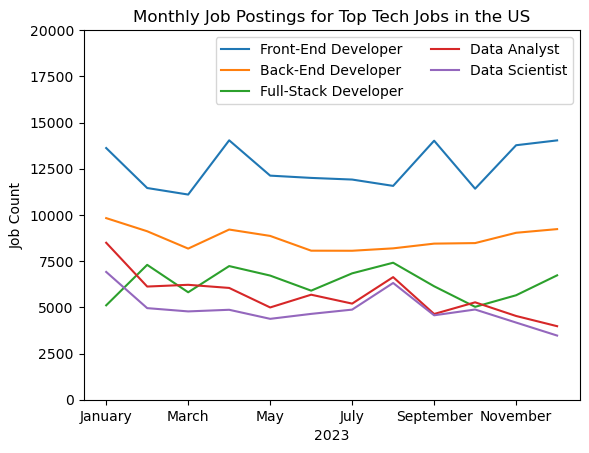

In [9]:
df_US_merged[top_5].plot(kind="line")
plt.title("Monthly Job Postings for Top Tech Jobs in the US")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.ylim(0, 20000)
plt.legend(ncol=2)
plt.show()    

In [10]:
job_data = {
    "job_id": [1, 2, 3, 4, 5],
    "job_title": ["Data Scientist", "Software Engineer", "Product Manager", "Marketing Director", "HR Manager"],
    "company_name": ["Google", "Microsoft", "Apple", "Nike", "Starbucks"],
    "job_location": ["Mountain View, CA", "Redmond, WA", "Cupertino, CA", "Beaverton, OR", "Seattle, WA"]
}

company_data = {
    "company_name": ["Google", "Microsoft", "Apple", "Nike", "Starbucks"],
    "industry": ["Technology", "Technology", "Technology", "Apparel", "Food & Beverage"],
    "company_size": ["100,000+", "100,000+", "100,000+", "75,000+", "346,000+"]
}

df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [11]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [12]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [13]:
# Merge the two datasets on the 'job_id' column
df_job_company = df_jobs.merge(df_companies, on="company_name")
df_job_company = df_job_company.set_index("job_id")

In [14]:
df_job_company

,job_title,company_name,job_location,industry,company_size
job_id,,,,,
1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [15]:
# Filter for Data Analysts 
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()

# Create a column for month
df_DA["month"] = df_DA["job_posted_date"].dt.month

# Pivot table to count job postings by month
df_DA_pivot = df_DA.pivot_table(index="month", aggfunc="count")["job_title_short"] 

# Print the pivot table
df_DA_pivot

month
1     23585
2     16558
3     16243
4     15514
5     13423
6     16008
7     16095
8     18628
9     14969
10    16239
11    15230
12    13583
Name: job_title_short, dtype: int64

In [16]:
# Filter for Senior Data Analysts 
df_SDA = df[df["job_title_short"] == "Senior Data Analyst"].copy()

# Create a column for month
df_SDA["month"] = df_SDA["job_posted_date"].dt.month

# Pivot table to count job postings by month
df_SDA_pivot = df_SDA.pivot_table(index="month", aggfunc="count")["job_title_short"]

# Print the pivot table
df_SDA_pivot

month
1     3696
2     2713
3     2454
4     2351
5     1925
6     2319
7     2380
8     2951
9     2194
10    2317
11    2117
12    1799
Name: job_title_short, dtype: int64

In [17]:
## Merge the two pivot tables
merged_DA_pivot = pd.merge(df_DA_pivot, df_SDA_pivot, how="outer", left_index=True, right_index=True)

# Rename the columns
merged_DA_pivot.columns = ["DA_count","SDA_count"] 

merged_DA_pivot

,DA_count,SDA_count
month,,
1,23585,3696
2,16558,2713
3,16243,2454
4,15514,2351
5,13423,1925
6,16008,2319
7,16095,2380
8,18628,2951
9,14969,2194


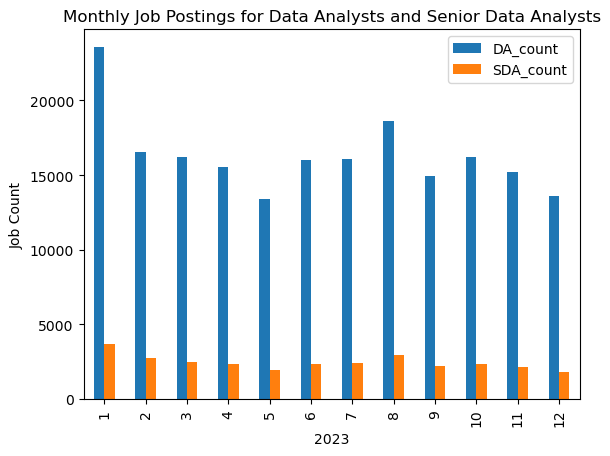

In [18]:
merged_DA_pivot.plot(kind="bar")
plt.title("Monthly Job Postings for Data Analysts and Senior Data Analysts")
plt.xlabel("2023")
plt.ylabel("Job Count")

plt.show()